In this Project, my objective is to analyze text data and to predict topics of the customers' requests.
<br>
The data contain about 7000 requests of customers for fixing bugs in a product.
<br>
Using labeled data and requests' details, data analysis and prediction are possible. 
<br><br>
Made by: Alon Cohen
<br>
bigalon1990@gmail.com

## Data Analysis 

In [1]:
#Loading the data

import pandas as pd

df = pd.read_csv('updated 12082018.csv', encoding="latin-1")
df.head()

,Case Number,Title,Description,Case Comments,Topic - for PC
0,10087,Rodopi (IngentaConnect) - special character 'ß',Migration date: 7/14/2013 4:56:11 PM. Dear Pri...,"Status: 1st. line W4I\nDear Christian,\n\nThis...",Data display
1,10087,Rodopi (IngentaConnect) - special character 'ß',Migration date: 7/14/2013 4:56:11 PM. Dear Pri...,need to reload pubtech collection and test tha...,Data display
2,10087,Rodopi (IngentaConnect) - special character 'ß',Migration date: 7/14/2013 4:56:11 PM. Dear Pri...,"Hi Elad,\n\nCould you check if this case is re...",Data display
3,10087,Rodopi (IngentaConnect) - special character 'ß',Migration date: 7/14/2013 4:56:11 PM. Dear Pri...,"Please, reload Rodopi collection subset from t...",Data display
4,10087,Rodopi (IngentaConnect) - special character 'ß',Migration date: 7/14/2013 4:56:11 PM. Dear Pri...,"Dear Shahar,\n\nthanks for correcting!\n\nBest...",Data display


In [2]:
unique_cases=df.groupby('Case Number').nunique()
print(unique_cases.head())


             Case Number  Title  Description  Case Comments  Topic - for PC
Case Number                                                                
10087                  1      1            1              7               1
10099                  1      1            1             22               1
11750                  1      1            1              3               1
12439                  1      1            1             13               1
12644                  1      1            1              4               1


In [5]:
groupby_topic=df.groupby('Topic - for PC').nunique()
groupby_topic.head()

,Case Number,Title,Description,Case Comments,Topic - for PC
Topic - for PC,,,,,
Availability,184,184,184,1812,1
Citation tools,12,12,12,169,1
Coverage,39,39,39,442,1
Data,232,229,232,1973,1
Data availability,650,638,650,5543,1


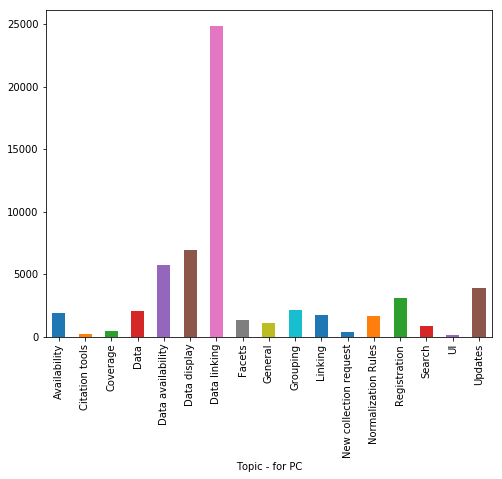

In [6]:
# Plotting the requests and their quantities

import matplotlib.pyplot as plt
fig = plt.figure(figsize=(8,6))
df.groupby('Topic - for PC').Title.count().plot.bar(ylim=0)
plt.show()

In [7]:
# Creating dictionary of the cases the their topics
cases_dict=dict()
count=0
for i in df['Case Number']:
    if i not in cases_dict.keys():
        cases_dict[(df['Case Number'][count])]=df['Topic - for PC'][count]
    count+=1
len(cases_dict)

6917

In [8]:
list(iter(cases_dict.items()))[0:20]


[(10087, 'Data display'),
 (10099, 'Data display'),
 (11750, 'Data display'),
 (12439, 'Data display'),
 (12644, 'Data availability'),
 (12665, 'Updates'),
 (13399, 'Updates'),
 (13415, 'General'),
 (13418, 'Data linking'),
 (13420, 'Data display'),
 (13489, 'Facets'),
 (14435, 'Data display'),
 (15053, 'Data'),
 (15247, 'Availability'),
 (15758, 'Normalization Rules'),
 (15824, 'Facets'),
 (16117, 'Linking'),
 (16118, 'Data display'),
 (17753, 'Data availability'),
 (18208, 'Data linking')]

In [10]:
casess_counter=dict(Counter(cases_dict.values()))
df_1=pd.DataFrame(list(casess_counter.items()),
                      columns=['Topic','Number of cases'])


df_1

,Topic,Number of cases
0,Data display,850
1,Data availability,650
2,Updates,357
3,General,158
4,Data linking,3120
5,Facets,162
6,Data,232
7,Availability,184
8,Normalization Rules,191
9,Linking,182


C:\Users\AlonPc\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


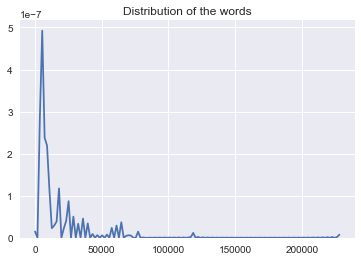

In [24]:
# Distribution of the words
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
dist_list=[]
for i in clean_text_counter.values():
    # print(i)
    dist_list.append(i)
dist_list = np.asarray(dist_list)
sns.set(color_codes=True)
sns.distplot(dist_list,hist=False)
plt.title('Distribution of the words')
plt.show()


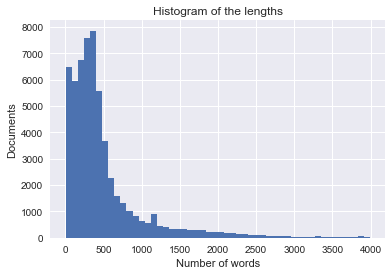

In [25]:
# Histogram of the lengths

df['Case Comments']=df['Case Comments'].astype(str)
df['Case Comments length'] = df['Case Comments'].apply(len)

df['Case Comments length'].plot(bins=50, kind='hist')
plt.title('Histogram of the lengths')
plt.xlabel('Number of words')
plt.ylabel('Documents')
plt.show()

## Data Cleaning

In [11]:
# Function that cleaning the data

import re
def my_function(raw):
    raw=raw.lower() 
    raw= raw.replace(']', '')
    raw= raw.replace('[', '')
    raw= raw.replace(')', '')
    raw= raw.replace('(', '')
    raw= raw.replace(':', '')
    raw= raw.replace('.', '')
    raw= raw.replace(',', '')
    raw= raw.replace('  ', ' ')
    raw= raw.replace('"', '')
    raw= raw.replace('\n', ' ')
    raw= raw.replace('\t', ' ')
    raw= raw.replace('?', '')
    raw= re.sub(r"http\S+", "", raw)
    raw= re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', "", raw)
    raw= re.sub(" \d{13} ", " isbn ", raw)
    raw= re.sub(" \d{10} ", " isbn ", raw)
    raw= re.sub(" \d{7}\d{1}[\dx] ", " issn ", raw)
    raw= re.sub(" \d{4}[-]\d{3}[\dx] ", " issn ", raw)
    raw= re.sub(" 10\.\S+ ", " doi ", raw)
    raw= re.sub('<.*>', "", raw)
    raw= re.sub('\S+@\S+', "email", raw)
    raw= re.sub('[0-9]+', "", raw)
    raw= re.sub(r'(\d+/\d+/\d+)', "date", raw)
    for i in raw.split():
        if len(i) > 22:
            raw = raw.replace(i,'')
    raw= raw.replace('$', '')
    raw = raw.replace('!', '')
    raw = raw.replace("'", '')
    raw = raw.replace("->", '')
    raw= raw.replace('&', '')
    raw= raw.replace('/', '')
    raw= raw.replace('%', ' ')
    raw= raw.replace(' - ', ' ')
    raw= raw.replace('+', '')
    raw= raw.replace('_', '')
    raw= raw.replace('@', '')
    raw = raw.replace('--', '')
    raw = raw.replace('#', '')
    raw = raw.replace('=', '')
    raw = raw.replace('â', '')
    raw = raw.replace('*', '')
    raw = raw.replace('-', '')
    raw = raw.replace(';', '')
    raw = raw.replace('<', '')
    raw = raw.replace('>', '')
    raw = raw.replace('ß', '')
    ' '.join(raw.split())
    raw= raw.replace('  ', ' ')
    raw= raw.replace('  ', ' ')


    return raw


In [12]:
# Creating a new data frame that separating the comments' text and the title & description text

merged_cases = pd.DataFrame( columns=['Case Number','Mixed Comments','Categorie'],)
cases_by_id=df.groupby('Case Number')

counter=0
for i in cases_dict.keys():
    case=cases_by_id.get_group(i)

    mix_comment=''
    
    for x in case['Title']:
        title=x
    for y in case['Description']:
        description=y

    mix_title=my_function(str(title)) + ' ' + my_function(str(description))
    for comment in case['Case Comments']:
        if len(str(comment).split())>4:
            mix_comment+=(' '+my_function(str(comment)))
        
    for t in case['Topic - for PC']:
        topic=t
    merged_cases.loc[counter]=[i,mix_comment,topic]
    counter+=1
    merged_cases.loc[counter]=[i,mix_title,topic]
    counter+=1
 
 
merged_cases.head()



,Case Number,Mixed Comments,Categorie
0,10087,status st line wi dear christian this is a de...,Data display
1,10087,rodopi ingentaconnect special character migra...,Data display
2,10099,hi rachel olga performed an in house analysis...,Data display
3,10099,directory of open access journals doaj wrong r...,Data display
4,11750,status st line wi dear kasper thank you for r...,Data display


In [15]:
# Removing topics with low frequencies

merged_cases.columns = ['Case Number','Mixed_Comments','Categorie']
merged_cases_A = merged_cases[merged_cases['Categorie'] != 'Citation tools']
merged_cases_A = merged_cases_A[merged_cases['Categorie'] != 'UI']
merged_cases_A = merged_cases_A[merged_cases['Categorie'] != 'Coverage']
merged_cases_A = merged_cases_A[merged_cases['Categorie'] != 'New collection request']
merged_cases_A = merged_cases_A[merged_cases['Categorie'] != 'Search']
merged_cases_A = merged_cases_A[merged_cases['Categorie'] != 'General']

C:\Users\AlonPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """
C:\Users\AlonPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\AlonPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  import sys
C:\Users\AlonPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  
C:\Users\AlonPc\Anaconda3\lib\site-packages\ipykernel_launcher.py:9: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if __name__ == '__main__':


In [16]:
# Merging categories that technically are the same  

merged_cases_A['Categorie'].replace('Availability', 'Data availability', inplace=True)
merged_cases_A['Categorie'].replace('Linking', 'Data linking', inplace=True)

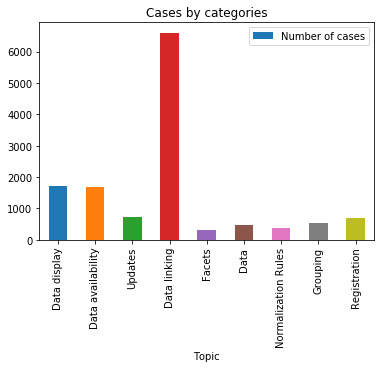

In [17]:
# Plotting the requests and their quantities after the topics were removed and merged

import matplotlib.pyplot as plt
from collections import Counter

casess_counter=dict(Counter(merged_cases_A['Categorie']))
df_2=pd.DataFrame(list(casess_counter.items()),
                      columns=['Topic','Number of cases'])


ax = df_2.plot.bar(x='Topic', y='Number of cases', rot=0)
plt.title('Cases by categories')
plt.xticks(rotation=90)
plt.show()
fname="label.png"
plt.savefig(fname, bbox_inches="tight")
plt.close("all")

In [18]:
# Create a Terms Matrix

import pickle
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=0.2, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(merged_cases_A.Mixed_Comments).toarray()
labels = merged_cases_A.Categorie
print(features.shape)

(13092, 109)


In [19]:
# Data before cleaning
all_text=''
for i in df['Case Comments']:
    all_text+=str(' '+ str(i))


from collections import Counter
split_clean_text=all_text.split()
clean_text_counter=Counter(split_clean_text)
len(clean_text_counter)

158779

In [20]:
# Data after cleaning
all_text_clean=''

for i in merged_cases_A['Mixed_Comments']:
    all_text_clean+=str(' '+ str(i))

split_clean_text=all_text_clean.split()
clean_text_counter=Counter(split_clean_text)
len(clean_text_counter)

47974

## More Analysis

In [21]:
# Split the data to test and train
# Finding the most correlated words for each topic using TF-IDF algorithm

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
import numpy as np
import pandas as pd
import pydotplus
import graphviz
import matplotlib.pyplot as plt
import re
from io import StringIO
from sklearn.feature_selection import chi2
from sklearn.naive_bayes import MultinomialNB
merged_cases_A['problem_id'] = merged_cases_A['Categorie'].factorize()[0]

problem_id_df = merged_cases_A[['Categorie', 'problem_id']].drop_duplicates().sort_values('problem_id')
problem_to_id = dict(problem_id_df.values)
id_to_topic = dict(problem_id_df[['problem_id', 'Categorie']].values)

tfidf = TfidfVectorizer(sublinear_tf=True, min_df=5, norm='l2', encoding='latin-1', ngram_range=(1, 2), stop_words='english')
features = tfidf.fit_transform(merged_cases_A.Mixed_Comments).toarray()
labels = merged_cases_A.problem_id
print(features.shape)

N = 5
for topic, problem_id in sorted(problem_to_id.items()):
  features_chi2 = chi2(features, labels == problem_id)
  indices = np.argsort(features_chi2[0])
  feature_names = np.array(tfidf.get_feature_names())[indices]
  unigrams = [v for v in feature_names if len(v.split(' ')) == 1]
  bigrams = [v for v in feature_names if len(v.split(' ')) == 2]
  print("# '{}':".format(topic))
  print("  . Most correlated unigrams:\n. {}".format('\n. '.join(unigrams[-N:])))
  print("  . Most correlated bigrams:\n. {}".format('\n. '.join(bigrams[-N:])))



(13092, 48547)
# 'Data':
  . Most correlated unigrams:
. shor
. liron
. shai
. ihp
. shir
  . Most correlated bigrams:
. central analyst
. tier analyst
. lexisnexis records
. invalid characters
. ronit primo
# 'Data availability':
  . Most correlated unigrams:
. indication
. holdings
. available
. false
. availability
  . Most correlated bigrams:
. ft ft
. availability indication
. false positivenegative
. file url
. text available
# 'Data display':
  . Most correlated unigrams:
. author
. authors
. incomplete
. characters
. display
  . Most correlated bigrams:
. does data
. data exist
. expected display
. display proof
. exist source
# 'Data linking':
  . Most correlated unigrams:
. link
. openurl
. broken
. linking
. target
  . Most correlated bigrams:
. right information
. giving right
. target url
. linking issue
. broken link
# 'Facets':
  . Most correlated unigrams:
. peerreviewed
. refine
. vals
. facets
. facet
  . Most correlated bigrams:
. collection facet
. resource type
. t

In [160]:
#Training LDA model
from nltk.tokenize import RegexpTokenizer
from stop_words import get_stop_words
from nltk.stem.porter import PorterStemmer
from gensim import corpora, models
import gensim

tokenizer = RegexpTokenizer(r'\w+')
en_stop = get_stop_words('en')
p_stemmer = PorterStemmer()


data_list=[]
for i in merged_cases_A['Mixed_Comments']:
    data_list.append(i)

texts = []
for i in data_list:
    raw = i.lower()
    tokens = tokenizer.tokenize(raw)
    stopped_tokens = [i for i in tokens if not i in en_stop]
    stemmed_tokens = [p_stemmer.stem(i) for i in stopped_tokens]
    texts.append(stemmed_tokens)


dictionary = corpora.Dictionary(texts)
corpus = [dictionary.doc2bow(text) for text in texts]
ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics=4, id2word = dictionary, passes=20)

print(ldamodel.print_topics(num_topics=9, num_words=4))

C:\Users\AlonPc\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")


[(0, '0.028*"case" + 0.027*"record" + 0.024*"link" + 0.023*"thank"'), (1, '0.030*"articl" + 0.024*"link" + 0.022*"record" + 0.017*"primo"'), (2, '0.020*"thank" + 0.020*"record" + 0.018*"case" + 0.017*"updat"'), (3, '0.028*"email" + 0.018*"isbn" + 0.011*"de" + 0.008*"book"')]


In [50]:
# Training a Word2Vev Model
# Create a cleaning function for the Word2Vev model

import re
def my_function_for_w2v(raw):
    raw=raw.lower() 
    raw= raw.replace(']', '')
    raw= raw.replace('[', '')
    raw= raw.replace(')', '')
    raw= raw.replace('(', '')
    raw= raw.replace(':', '')
    raw= raw.replace('.', '')
    raw= raw.replace(',', '')
    raw= raw.replace('  ', ' ')
    raw= raw.replace('"', '')
    raw= raw.replace('\t', ' ')
    raw= raw.replace('?', '')
    raw= re.sub(r"http\S+", "", raw)
    raw= re.sub('https?://(?:[-\w.]|(?:%[\da-fA-F]{2}))+', "", raw)
    raw= re.sub(" \d{13} ", " isbn ", raw)
    raw= re.sub(" \d{10} ", " isbn ", raw)
    raw= re.sub(" \d{7}\d{1}[\dx] ", " issn ", raw)
    raw= re.sub(" \d{4}[-]\d{3}[\dx] ", " issn ", raw)
    raw= re.sub(" 10\.\S+ ", " doi ", raw)
    raw= re.sub('<.*>', "", raw)
    raw= re.sub('\S+@\S+', "email", raw)
    raw= re.sub('[0-9]+', "", raw)
    raw= re.sub(r'(\d+/\d+/\d+)', "date", raw)
    for i in raw.split():
        if len(i) > 22:
            raw = raw.replace(i,'')
    raw= raw.replace('$', '')
    raw = raw.replace('!', '')
    raw = raw.replace("'", '')
    raw = raw.replace("->", '')
    raw= raw.replace('&', '')
    raw= raw.replace('/', '')
    raw= raw.replace('%', ' ')
    raw= raw.replace(' - ', ' ')
    raw= raw.replace('+', '')
    raw= raw.replace('_', '')
    raw= raw.replace('@', '')
    raw = raw.replace('--', '')
    raw = raw.replace('#', '')
    raw = raw.replace('=', '')
    raw = raw.replace('â', '')
    raw = raw.replace('*', '')
    raw = raw.replace('-', '')
    raw = raw.replace(';', '')
    raw = raw.replace('<', '')
    raw = raw.replace('>', '')
    raw = raw.replace('ß', '')
    ' '.join(raw.split())
    raw= raw.replace('  ', ' ')
    raw= raw.replace('  ', ' ')


    return raw


In [51]:
#Create a new data frame for the Word2Vev model 

merged_cases_for_w2v = pd.DataFrame( columns=['Case Number','Mixed Comments','Categorie'],)
cases_by_id_for_w2v=df.groupby('Case Number')

counter=0
for i in cases_dict.keys():
    case_for_w2v=cases_by_id_for_w2v.get_group(i)

    mix_comment_for_w2v=''
    
    for x in case_for_w2v['Title']:
        title_for_w2v=x
    for y in case_for_w2v['Description']:
        description_for_w2v=y
    mix_title_for_w2v=my_function_for_w2v(str(title_for_w2v)) + ' ' + my_function_for_w2v(str(description_for_w2v))
    for comment_for_w2v in case_for_w2v['Case Comments']:
        if len(str(comment_for_w2v).split())>4:
            mix_comment_for_w2v+=(' '+my_function_for_w2v(str(comment_for_w2v)))
        
    for t in case_for_w2v['Topic - for PC']:
        topic_for_w2v=t
    merged_cases_for_w2v.loc[counter]=[i,mix_comment_for_w2v,topic_for_w2v]
    counter+=1
    merged_cases_for_w2v.loc[counter]=[i,mix_title_for_w2v,topic_for_w2v]
    counter+=1
 

merged_cases_for_w2v.head()


,Case Number,Mixed Comments,Categorie
0,10087,status st line wi\ndear christian\n\nthis is ...,Data display
1,10087,rodopi ingentaconnect special character migra...,Data display
2,10099,hi rachel\n\nolga performed an in house analy...,Data display
3,10099,directory of open access journals doaj wrong r...,Data display
4,11750,status st line wi\ndear kasper\n\nthank you f...,Data display


In [52]:
# Preparing the data to fit the model
clean_all_text=''
for i in merged_cases_for_w2v['Mixed Comments']:
    clean_all_text+=my_function_for_w2v(i)

In [53]:
#Removing stop words and splitting the text to splitted sentences
import re
from nltk.corpus import stopwords
enter_model=[]
pattern = re.compile(r'\b(' + r'|'.join(stopwords.words('english')) + r')\b\s')
text_without_stopwords = pattern.sub('', clean_all_text)
text_without_stopwords=text_without_stopwords.split('\n')
for i in text_without_stopwords:
    if len(i.split())>4:
        enter_model.append(i.split())

In [54]:
# Train the Word2Vec model
import gensim, logging
logging.basicConfig(format='%(asctime)s:%(levelname)s:%(message)s',level=logging.INFO)
model=gensim.models.Word2Vec(enter_model,min_count=2,window=10,size=150)

C:\Users\AlonPc\Anaconda3\lib\site-packages\gensim\utils.py:1197: UserWarning: detected Windows; aliasing chunkize to chunkize_serial
  warnings.warn("detected Windows; aliasing chunkize to chunkize_serial")
2019-01-28 00:37:45,515:WARNING:consider setting layer size to a multiple of 4 for greater performance
2019-01-28 00:37:45,524:INFO:collecting all words and their counts
2019-01-28 00:37:45,529:INFO:PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2019-01-28 00:37:45,667:INFO:PROGRESS: at sentence #10000, processed 112739 words, keeping 8504 word types
2019-01-28 00:37:45,815:INFO:PROGRESS: at sentence #20000, processed 228260 words, keeping 12711 word types
2019-01-28 00:37:45,967:INFO:PROGRESS: at sentence #30000, processed 343594 words, keeping 15949 word types
2019-01-28 00:37:46,113:INFO:PROGRESS: at sentence #40000, processed 456267 words, keeping 18670 word types
2019-01-28 00:37:46,248:INFO:PROGRESS: at sentence #50000, processed 566473 words, keeping 21368

In [56]:
#Illustrating the embeddings semantics
print('The names of the different analysts in the company have similar vectors')
model.wv.most_similar('tomer',topn=10)

The names of the different analysts in the company has similar vectors


[('vicky', 0.9005892276763916),
 ('sharon', 0.8919146060943604),
 ('ksenia', 0.8675036430358887),
 ('shahar', 0.8522517681121826),
 ('bob', 0.8393317461013794),
 ('daria', 0.8332645893096924),
 ('alison', 0.8294651508331299),
 ('veerle', 0.8286025524139404),
 ('olga', 0.8285531997680664),
 ('rachel', 0.8250610828399658)]

In [58]:
#Illustrating the embeddings semantics
print('The names of the different vendors in the have similar vectors')
model.wv.most_similar('jstor',topn=10)

The names of the different vendors in the has similar vectors


[('sage', 0.747258186340332),
 ('elsevier', 0.7268825769424438),
 ('sciencedirect', 0.6844416260719299),
 ('springer', 0.671920120716095),
 ('journals', 0.6593728065490723),
 ('ingenta', 0.65279221534729),
 ('ovid', 0.6363487839698792),
 ('wiley', 0.6345236897468567),
 ('ebsco', 0.6253975629806519),
 ('doaj', 0.6209652423858643)]

In [17]:
# Create a function that removes stop words

from sklearn.pipeline import Pipeline
import string
def text_clean(mess):
    nopunc = [char for char in mess if char not in string.punctuation]
    
    nopunc = ''.join(nopunc)
    try:
        return [word for word in nopunc.split() if word.lower() not in stopwords.words(english)]
    except:
        return [word for word in nopunc.split()]




## Classifying the requests' topics
<br><br>
In this section I am trying different classifications models to find the one with the highest accuracy.
<br>
Two general methods will be tested:
<br>
1) One stage model: classifying all the different topics in one stage.
<br>
2) Two stages model: classifying to the dominant topic (Data Linking) and others. If a request belongs to "Others" then a second classifier will be applied. 

## One stage model

In [252]:
#Multinomial NB

import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
pipeline_MultinomialNB = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean,stop_words='english', ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])
pipeline_MultinomialNB.fit(X_train, y_train)
predictions_MultinomialNB = pipeline_MultinomialNB.predict(X_test)     

print(classification_report(y_test, predictions_MultinomialNB))
print("\n")
print(confusion_matrix(y_test, predictions_MultinomialNB))

                     precision    recall  f1-score   support

               Data       0.00      0.00      0.00       139
  Data availability       0.00      0.00      0.00       469
       Data display       0.33      0.00      0.00       528
       Data linking       0.51      1.00      0.67      1999
             Facets       0.00      0.00      0.00        93
           Grouping       0.00      0.00      0.00       167
Normalization Rules       0.00      0.00      0.00       119
       Registration       0.00      0.00      0.00       196
            Updates       0.00      0.00      0.00       218

        avg / total       0.30      0.51      0.34      3928



[[   0    0    0  139    0    0    0    0    0]
 [   0    0    0  469    0    0    0    0    0]
 [   0    0    1  527    0    0    0    0    0]
 [   0    0    0 1999    0    0    0    0    0]
 [   0    0    1   92    0    0    0    0    0]
 [   0    0    0  167    0    0    0    0    0]
 [   0    0    0  119    0    0    0

C:\Users\AlonPc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [202]:
#Random Forest

pipeline_rf = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean, stop_words='english', ngram_range=(1, 7))),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=300))
])
pipeline_rf.fit(X_train, y_train)
predictions_rf = pipeline_rf.predict(X_test)
print(classification_report(y_test, predictions_rf))    
print("\n")
print(confusion_matrix(y_test, predictions_rf))

                     precision    recall  f1-score   support

               Data       1.00      0.01      0.03       139
  Data availability       0.81      0.38      0.52       469
       Data display       0.69      0.10      0.18       528
       Data linking       0.59      0.98      0.74      1999
             Facets       0.80      0.30      0.44        93
           Grouping       0.98      0.26      0.42       167
Normalization Rules       0.00      0.00      0.00       119
       Registration       0.87      0.59      0.71       196
            Updates       0.87      0.32      0.46       218

        avg / total       0.68      0.63      0.55      3928



[[   2    2    1  130    0    0    0    1    3]
 [   0  180    0  284    1    0    0    4    0]
 [   0    5   55  458    2    0    0    4    4]
 [   0   20    7 1968    1    1    0    2    0]
 [   0    3    1   60   28    0    0    1    0]
 [   0    1    1  118    2   44    0    0    1]
 [   0    0   10  105    1    0    0

C:\Users\AlonPc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [203]:
# SVC

from sklearn.svm import SVC
pipeline_svm = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])
pipeline_svm.fit(X_train, y_train)
predictions_svm = pipeline_svm.predict(X_test)
print(classification_report(y_test, predictions_svm))
print("\n")
print(confusion_matrix(y_test, predictions_svm))

                     precision    recall  f1-score   support

               Data       0.00      0.00      0.00       139
  Data availability       0.00      0.00      0.00       469
       Data display       0.00      0.00      0.00       528
       Data linking       0.51      1.00      0.67      1999
             Facets       0.00      0.00      0.00        93
           Grouping       0.00      0.00      0.00       167
Normalization Rules       0.00      0.00      0.00       119
       Registration       0.00      0.00      0.00       196
            Updates       0.00      0.00      0.00       218

        avg / total       0.26      0.51      0.34      3928



[[   0    0    0  139    0    0    0    0    0]
 [   0    0    0  469    0    0    0    0    0]
 [   0    0    0  528    0    0    0    0    0]
 [   0    0    0 1999    0    0    0    0    0]
 [   0    0    0   93    0    0    0    0    0]
 [   0    0    0  167    0    0    0    0    0]
 [   0    0    0  119    0    0    0

C:\Users\AlonPc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [26]:
# Logistic Regression

from sklearn.metrics import classification_report, confusion_matrix
from sklearn.linear_model import LogisticRegression
pipeline_lr = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])
pipeline_lr.fit(X_train, y_train)
predictions_lr = pipeline_lr.predict(X_test)
print(classification_report(y_test, predictions_lr))
print("\n")
print(confusion_matrix(y_test, predictions_lr))

                     precision    recall  f1-score   support

               Data       0.70      0.05      0.09       139
  Data availability       0.73      0.59      0.65       469
       Data display       0.63      0.48      0.54       528
       Data linking       0.73      0.95      0.83      1999
             Facets       0.78      0.66      0.71        93
           Grouping       0.92      0.51      0.66       167
Normalization Rules       1.00      0.05      0.10       119
       Registration       0.81      0.79      0.80       196
            Updates       0.78      0.56      0.65       218

        avg / total       0.74      0.73      0.70      3928



[[   7    7   21   97    0    0    0    2    5]
 [   0  278    7  171    1    1    0    9    2]
 [   2   15  252  229    6    2    0    8   14]
 [   0   54   30 1907    1    2    0    2    3]
 [   0    1   15   12   61    0    0    2    2]
 [   0    2   12   61    5   85    0    0    2]
 [   1    5   45   53    3    1    6

In [431]:
# SGDClassifier

from sklearn.linear_model import SGDClassifier
pipeline_SGD = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                    alpha=1e-3, random_state=42,max_iter=5, tol=None)),
                    ])
pipeline_SGD.fit(X_train, y_train)
predictions_SGD = pipeline_lr.predict(X_test)
print(classification_report(y_test, predictions_SGD))
print("\n")
print(confusion_matrix(y_test, predictions_SGD))

                     precision    recall  f1-score   support

               Data       0.70      0.05      0.09       139
  Data availability       0.73      0.59      0.65       469
       Data display       0.63      0.48      0.54       528
       Data linking       0.73      0.95      0.83      1999
             Facets       0.78      0.66      0.71        93
           Grouping       0.92      0.51      0.66       167
Normalization Rules       1.00      0.05      0.10       119
       Registration       0.81      0.79      0.80       196
            Updates       0.78      0.56      0.65       218

        avg / total       0.74      0.73      0.70      3928



[[   7    7   21   97    0    0    0    2    5]
 [   0  278    7  171    1    1    0    9    2]
 [   2   14  252  230    6    2    0    8   14]
 [   0   54   30 1907    1    2    0    2    3]
 [   0    1   15   12   61    0    0    2    2]
 [   0    2   12   61    5   85    0    0    2]
 [   1    5   45   53    3    1    6

In [231]:
#KNN

from sklearn.neighbors import KNeighborsClassifier
pipeline_knn = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean)),
    ('tfidf', TfidfTransformer()),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn.fit(X_train, y_train)
predictions_knn = pipeline_knn.predict(X_test)
print(classification_report(y_test, predictions_knn))
print("\n")
print(confusion_matrix(y_test, predictions_knn))

                     precision    recall  f1-score   support

               Data       0.12      0.32      0.18       139
  Data availability       0.20      0.45      0.28       469
       Data display       0.42      0.16      0.23       528
       Data linking       0.65      0.67      0.66      1999
             Facets       0.85      0.12      0.21        93
           Grouping       0.23      0.10      0.14       167
Normalization Rules       0.11      0.05      0.07       119
       Registration       0.42      0.17      0.24       196
            Updates       0.33      0.11      0.17       218

        avg / total       0.49      0.45      0.44      3928



[[  44   32    5   51    0    0    4    1    2]
 [  48  210   12  179    0    5    9    4    2]
 [  41  149   82  213    1    9    8   12   13]
 [ 135  394   53 1333    0   34   14   16   20]
 [  10   34    1   28   11    1    2    3    3]
 [  15   55   14   55    1   16    4    2    5]
 [  15   41   10   42    0    1    6

## Two stage model

In [19]:
# Testing the models on all the topics (Excepct for Data Linking)
# Create a new data frame of all the topics except for "Data linking"

not_linking=merged_cases_A[merged_cases_A['Categorie'] != 'Data linking']
not_linking.head()

,Case Number,Mixed_Comments,Categorie,problem_id
0,10087,status st line wi dear christian this is a de...,Data display,0
1,10087,rodopi ingentaconnect special character migra...,Data display,0
2,10099,hi rachel olga performed an in house analysis...,Data display,0
3,10099,directory of open access journals doaj wrong r...,Data display,0
4,11750,status st line wi dear kasper thank you for r...,Data display,0


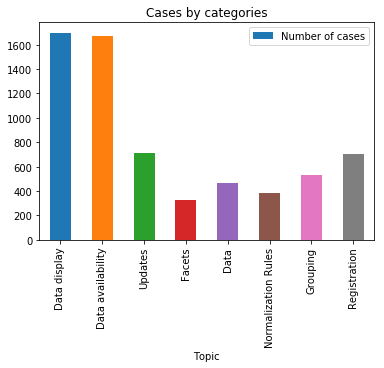

In [20]:
# Plotting the "Others" topics

import matplotlib.pyplot as plt
from collections import Counter

casess_counter=dict(Counter(not_linking['Categorie']))
df_4=pd.DataFrame(list(casess_counter.items()),
                      columns=['Topic','Number of cases'])


ax = df_4.plot.bar(x='Topic', y='Number of cases', rot=0)
plt.title('Cases by categories')
plt.xticks(rotation=90)
plt.show()
fname="label.png"
plt.savefig(fname, bbox_inches="tight")
plt.close("all")

In [21]:
# Split the data to test and train

features_1 = tfidf.fit_transform(not_linking.Mixed_Comments).toarray()
labels_1 = not_linking.problem_id
print(features.shape)

X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(not_linking['Mixed_Comments'], not_linking['Categorie'], random_state = 42,test_size=0.3)


(13092, 48547)


In [22]:
#Crating new dataframe of "Data Linking" and "Others" 

linking_or_not_linking=merged_cases_A
Topic_copy = linking_or_not_linking['Categorie']    
for i in linking_or_not_linking.index:
    if linking_or_not_linking.at[i, 'Categorie'] != 'Data linking':
        linking_or_not_linking.at[i, 'Categorie'] = 'Other'  
    
linking_or_not_linking.head()

,Case Number,Mixed_Comments,Categorie,problem_id
0,10087,status st line wi dear christian this is a de...,Other,0
1,10087,rodopi ingentaconnect special character migra...,Other,0
2,10099,hi rachel olga performed an in house analysis...,Other,0
3,10099,directory of open access journals doaj wrong r...,Other,0
4,11750,status st line wi dear kasper thank you for r...,Other,0


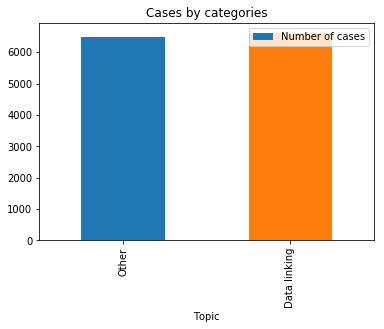

In [23]:
# Plotting "Others" vs "Data Linking" topics

casess_counter=dict(Counter(linking_or_not_linking['Categorie']))
df_5=pd.DataFrame(list(casess_counter.items()),
                      columns=['Topic','Number of cases'])


ax = df_5.plot.bar(x='Topic', y='Number of cases', rot=0)
plt.title('Cases by categories')
plt.xticks(rotation=90)
plt.show()
fname="label.png"
plt.savefig(fname, bbox_inches="tight")
plt.close("all")

In [248]:
linking_or_not_linking['Categorie'].value_counts()

Data linking    6604
Other           6488
Name: Categorie, dtype: int64

In [24]:
# Split the data to test and train

features_2 = tfidf.fit_transform(not_linking.Mixed_Comments).toarray()
labels_2 = not_linking.problem_id
print(features.shape)

X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(linking_or_not_linking['Mixed_Comments'], linking_or_not_linking['Categorie'], random_state = 42,test_size=0.3)


(13092, 48547)


## Data Linking / Others Classification

In [253]:
#Naive Bayes

pipeline_MultinomialNB_linking = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean,stop_words='english', ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])
pipeline_MultinomialNB_linking.fit(X_train_2, y_train_2)
predictions_MultinomialNB_linking = pipeline_MultinomialNB_linking.predict(X_test_2)   

print(classification_report(y_test_2, predictions_MultinomialNB_linking))
print("\n")
print(confusion_matrix(y_test_2, predictions_MultinomialNB_linking))

              precision    recall  f1-score   support

Data linking       0.80      0.87      0.83      1999
       Other       0.85      0.77      0.81      1929

 avg / total       0.83      0.82      0.82      3928



[[1738  261]
 [ 435 1494]]


In [254]:
#Random Forest

pipeline_rf_linking = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean,stop_words='english', ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=300))
])
pipeline_rf_linking.fit(X_train_2, y_train_2)
predictions_rf_linking = pipeline_rf_linking.predict(X_test_2)   

print(classification_report(y_test_2, predictions_rf_linking))
print("\n")
print(confusion_matrix(y_test_2, predictions_rf_linking))

              precision    recall  f1-score   support

Data linking       0.85      0.84      0.84      1999
       Other       0.83      0.85      0.84      1929

 avg / total       0.84      0.84      0.84      3928



[[1671  328]
 [ 291 1638]]


In [27]:
#Logistic Regression

pipeline_lr_linking = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])
pipeline_lr_linking.fit(X_train_2, y_train_2)
predictions_lr_linking = pipeline_lr_linking.predict(X_test_2)
print(classification_report(y_test_2, predictions_lr_linking))
print("\n")
print(confusion_matrix(y_test_2, predictions_lr_linking))

              precision    recall  f1-score   support

Data linking       0.86      0.85      0.86      1999
       Other       0.85      0.86      0.85      1929

 avg / total       0.86      0.86      0.86      3928



[[1709  290]
 [ 277 1652]]


In [266]:
#SGD

pipeline_SGD_linking = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                    alpha=1e-3, random_state=42,max_iter=5, tol=None)),
                    ])
pipeline_SGD_linking.fit(X_train_2, y_train_2)
predictions_SGD_linking = pipeline_SGD_linking.predict(X_test_2)
print(classification_report(y_test_2, predictions_SGD_linking))
print("\n")
print(confusion_matrix(y_test_2, predictions_SGD_linking))

              precision    recall  f1-score   support

Data linking       0.86      0.83      0.84      1999
       Other       0.83      0.86      0.84      1929

 avg / total       0.84      0.84      0.84      3928



[[1659  340]
 [ 278 1651]]


In [269]:
#SVC

pipeline_svm_linking = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])
pipeline_svm_linking.fit(X_train_2, y_train_2)
predictions_svm_linking = pipeline_svm_linking.predict(X_test_2)
print(classification_report(y_test_2, predictions_svm_linking))
print("\n")
print(confusion_matrix(y_test_2, predictions_svm_linking))

              precision    recall  f1-score   support

Data linking       0.51      1.00      0.67      1999
       Other       0.00      0.00      0.00      1929

 avg / total       0.26      0.51      0.34      3928



[[1999    0]
 [1929    0]]


C:\Users\AlonPc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [268]:
#KNN

pipeline_knn_linking = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean)),
    ('tfidf', TfidfTransformer()),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn_linking.fit(X_train_2, y_train_2)
predictions_knn_linking = pipeline_knn_linking.predict(X_test_2)
print(classification_report(y_test_2, predictions_knn_linking))
print("\n")
print(confusion_matrix(y_test_2, predictions_knn_linking))

              precision    recall  f1-score   support

Data linking       0.74      0.52      0.61      1999
       Other       0.62      0.81      0.70      1929

 avg / total       0.68      0.67      0.66      3928



[[1047  952]
 [ 362 1567]]


In [45]:
#LSTM
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.models import Model
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding
from keras.optimizers import RMSprop
from keras.preprocessing.text import Tokenizer
from keras.preprocessing import sequence
from keras.utils import to_categorical
from keras.callbacks import EarlyStopping
%matplotlib inline

# Create a new data frame for the LSTM classification
linking_or_not_linking_lstm=linking_or_not_linking
linking_or_not_linking_lstm['Categorie'].replace('Data linking', 0, inplace=True)
linking_or_not_linking_lstm['Categorie'].replace('Other', 1, inplace=True)
linking_or_not_linking_lstm


X = linking_or_not_linking.Mixed_Comments
Y = linking_or_not_linking.Categorie
le = LabelEncoder()
Y = le.fit_transform(Y)
Y = Y.reshape(-1,1)

# Spliting the data to train and test
X_train_lstm,X_test_lstm,Y_train_lstm,Y_test_lstm = train_test_split(X,Y,test_size=0.15)

max_words = 1500
max_len = 200
tok = Tokenizer(num_words=max_words)
tok.fit_on_texts(X_train_lstm)
sequences = tok.texts_to_sequences(X_train_lstm)
sequences_matrix = sequence.pad_sequences(sequences,maxlen=max_len)

def RNN():
    inputs = Input(name='inputs',shape=[max_len])
    layer = Embedding(max_words,50,input_length=max_len)(inputs)
    layer = LSTM(64)(layer)
    layer = Dense(256,name='FC1')(layer)
    layer = Activation('relu')(layer)
    layer = Dropout(0.5)(layer)
    layer = Dense(1,name='out_layer')(layer)
    layer = Activation('sigmoid')(layer)
    model_lstm = Model(inputs=inputs,outputs=layer)
    return model_lstm

model_lstm = RNN()
model_lstm.summary()
model_lstm.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          (None, 200)               0         
_________________________________________________________________
embedding_3 (Embedding)      (None, 200, 50)           75000     
_________________________________________________________________
lstm_3 (LSTM)                (None, 64)                29440     
_________________________________________________________________
FC1 (Dense)                  (None, 256)               16640     
_________________________________________________________________
activation_5 (Activation)    (None, 256)               0         
_________________________________________________________________
dropout_3 (Dropout)          (None, 256)               0         
_________________________________________________________________
out_layer (Dense)            (None, 1)                 257       
__________

In [46]:
# Traing the network
history=model_lstm.fit(sequences_matrix,Y_train_lstm,batch_size=128,epochs=10,
          validation_split=0.2,)

Train on 8902 samples, validate on 2226 samples
Epoch 1/10
8902/8902 [==============================] - 32s 4ms/step - loss: 0.5971 - acc: 0.6795 - val_loss: 0.4573 - val_acc: 0.8037
Epoch 2/10
8902/8902 [==============================] - 28s 3ms/step - loss: 0.4134 - acc: 0.8308 - val_loss: 0.4468 - val_acc: 0.8140
Epoch 3/10
8902/8902 [==============================] - 28s 3ms/step - loss: 0.3815 - acc: 0.8461 - val_loss: 0.4402 - val_acc: 0.8113
Epoch 4/10
8902/8902 [==============================] - 27s 3ms/step - loss: 0.3804 - acc: 0.8503 - val_loss: 0.4242 - val_acc: 0.8266
Epoch 5/10
8902/8902 [==============================] - 33s 4ms/step - loss: 0.3458 - acc: 0.8649 - val_loss: 0.4135 - val_acc: 0.8356
Epoch 6/10
8902/8902 [==============================] - 30s 3ms/step - loss: 0.3369 - acc: 0.8680 - val_loss: 0.4135 - val_acc: 0.8351
Epoch 7/10
8902/8902 [==============================] - 27s 3ms/step - loss: 0.3216 - acc: 0.8742 - val_loss: 0.4225 - val_acc: 0.8311
Epoch 8

In [47]:
test_sequences = tok.texts_to_sequences(X_test_lstm)
test_sequences_matrix = sequence.pad_sequences(test_sequences,maxlen=max_len)
accr = model_lstm.evaluate(test_sequences_matrix,Y_test_lstm)
print('Test set\n  Loss: {:0.3f}\n  Accuracy: {:0.3f}'.format(accr[0],accr[1]))

1964/1964 [==============================] - 3s 2ms/step
Test set
  Loss: 0.431
  Accuracy: 0.838


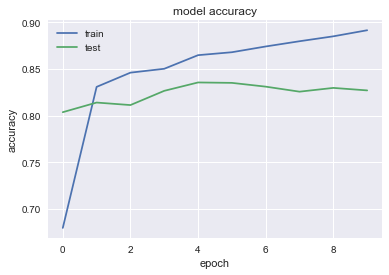

In [48]:
# summarize history for accuracy
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

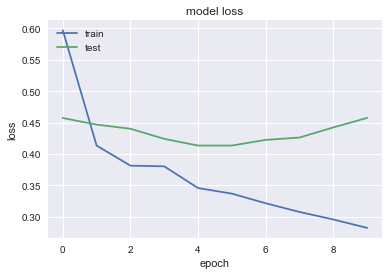

In [49]:
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [28]:
# Preparing a data frame to test the accuracy of the two-stage model

two_step_dataframe=merged_cases_A
two_step_dataframe['Categorie_A']=linking_or_not_linking['Categorie']
two_step_dataframe.head()  


,Case Number,Mixed_Comments,Categorie,problem_id,Categorie_A
0,10087,status st line wi dear christian this is a de...,Other,0,Other
1,10087,rodopi ingentaconnect special character migra...,Other,0,Other
2,10099,hi rachel olga performed an in house analysis...,Other,0,Other
3,10099,directory of open access journals doaj wrong r...,Other,0,Other
4,11750,status st line wi dear kasper thank you for r...,Other,0,Other


In [29]:
two_step_dataframe['step_one']=pipeline_lr_linking.predict(two_step_dataframe['Mixed_Comments'])
two_step_dataframe.head()


,Case Number,Mixed_Comments,Categorie,problem_id,Categorie_A,step_one
0,10087,status st line wi dear christian this is a de...,Other,0,Other,Other
1,10087,rodopi ingentaconnect special character migra...,Other,0,Other,Other
2,10099,hi rachel olga performed an in house analysis...,Other,0,Other,Other
3,10099,directory of open access journals doaj wrong r...,Other,0,Other,Other
4,11750,status st line wi dear kasper thank you for r...,Other,0,Other,Other


## Classifying all the topics except for "Data Linking"

In [296]:
#Naive Bayes
pipeline_MultinomialNB_others = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean,stop_words='english', ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('classifier', MultinomialNB())
])
pipeline_MultinomialNB_others.fit(X_train_1, y_train_1)
predictions_MultinomialNB_others = pipeline_MultinomialNB_others.predict(X_test_1)   

print(classification_report(y_test_1, predictions_MultinomialNB_others))
print("\n")
print(confusion_matrix(y_test_1, predictions_MultinomialNB_others))

                     precision    recall  f1-score   support

               Data       0.00      0.00      0.00       153
  Data availability       0.47      0.95      0.63       524
       Data display       0.44      0.75      0.56       509
             Facets       0.00      0.00      0.00        94
           Grouping       1.00      0.01      0.03       155
Normalization Rules       0.00      0.00      0.00       119
       Registration       1.00      0.01      0.02       199
            Updates       1.00      0.07      0.13       194

        avg / total       0.52      0.46      0.33      1947



[[  0  54  99   0   0   0   0   0]
 [  0 499  25   0   0   0   0   0]
 [  0 126 383   0   0   0   0   0]
 [  0  33  61   0   0   0   0   0]
 [  0  63  90   0   2   0   0   0]
 [  0  36  83   0   0   0   0   0]
 [  0 168  29   0   0   0   2   0]
 [  0  89  91   0   0   0   0  14]]


C:\Users\AlonPc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [297]:
#Random Forest

pipeline_rf_others = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean,stop_words='english', ngram_range=(1, 2))),
    ('tfidf', TfidfTransformer()),
    ('classifier', RandomForestClassifier(n_estimators=300))
])
pipeline_rf_others.fit(X_train_1, y_train_1)
predictions_rf_others = pipeline_rf_others.predict(X_test_1)   

print(classification_report(y_test_1, predictions_rf_others))
print("\n")
print(confusion_matrix(y_test_1, predictions_rf_others))


                     precision    recall  f1-score   support

               Data       0.74      0.19      0.30       153
  Data availability       0.71      0.86      0.77       524
       Data display       0.49      0.81      0.61       509
             Facets       0.90      0.48      0.63        94
           Grouping       0.90      0.52      0.66       155
Normalization Rules       0.00      0.00      0.00       119
       Registration       0.78      0.68      0.73       199
            Updates       0.83      0.49      0.62       194

        avg / total       0.65      0.64      0.61      1947



[[ 29  20  95   1   1   0   2   5]
 [  0 449  65   0   0   0   8   2]
 [  6  60 414   2   5   0  14   8]
 [  0   6  39  45   1   0   3   0]
 [  1  18  53   1  81   0   0   1]
 [  3  16  94   1   0   0   3   2]
 [  0  32  30   0   1   0 135   1]
 [  0  34  55   0   1   0   8  96]]


C:\Users\AlonPc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [30]:
#Logistic Regression

pipeline_lr_others = Pipeline([
    ('bow', CountVectorizer(analyzer='word', stop_words='english')),
    ('tfidf', TfidfTransformer()),
    ('classifier', LogisticRegression())
])
pipeline_lr_others.fit(X_train_1, y_train_1)
predictions_lr_others = pipeline_lr_others.predict(X_test_1)
print(classification_report(y_test_1, predictions_lr_others))
print("\n")
print(confusion_matrix(y_test_1, predictions_lr_others))

                     precision    recall  f1-score   support

               Data       0.71      0.33      0.45       153
  Data availability       0.79      0.83      0.81       524
       Data display       0.55      0.80      0.65       509
             Facets       0.81      0.72      0.76        94
           Grouping       0.86      0.67      0.75       155
Normalization Rules       0.57      0.03      0.06       119
       Registration       0.78      0.81      0.80       199
            Updates       0.78      0.64      0.70       194

        avg / total       0.71      0.70      0.67      1947



[[ 51  17  76   1   2   0   1   5]
 [  1 434  72   0   2   0  10   5]
 [ 12  44 407   7   8   2  16  13]
 [  0   1  18  68   2   1   4   0]
 [  1  12  31   3 104   0   2   2]
 [  5  16  78   5   1   4   4   6]
 [  0  10  20   0   2   0 162   5]
 [  2  18  42   0   0   0   8 124]]


In [299]:
#SGD

pipeline_SGD_others = Pipeline([('vect', CountVectorizer()),
                    ('tfidf', TfidfTransformer()),
                    ('clf', SGDClassifier(loss='hinge', penalty='l2',
                    alpha=1e-3, random_state=42,max_iter=5, tol=None)),
                    ])
pipeline_SGD_others.fit(X_train_1, y_train_1)
predictions_SGD_others = pipeline_SGD_others.predict(X_test_1)
print(classification_report(y_test_1, predictions_SGD_others))
print("\n")
print(confusion_matrix(y_test_1, predictions_SGD_others))

                     precision    recall  f1-score   support

               Data       0.73      0.31      0.43       153
  Data availability       0.77      0.86      0.81       524
       Data display       0.62      0.70      0.66       509
             Facets       0.72      0.83      0.77        94
           Grouping       0.75      0.77      0.76       155
Normalization Rules       0.50      0.07      0.12       119
       Registration       0.70      0.86      0.77       199
            Updates       0.73      0.71      0.72       194

        avg / total       0.69      0.70      0.68      1947



[[ 47  22  59   2   9   1   5   8]
 [  1 449  43   3   3   1  18   6]
 [ 11  56 358  13  18   4  28  21]
 [  0   1   8  78   3   1   3   0]
 [  1  11  16   3 120   1   1   2]
 [  4  17  65   9   2   8   7   7]
 [  0  12   5   0   3   0 172   7]
 [  0  17  26   0   1   0  13 137]]


In [300]:
#SVC

pipeline_svm_others = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean)),
    ('tfidf', TfidfTransformer()),
    ('classifier', SVC())
])
pipeline_svm_others.fit(X_train_1, y_train_1)
predictions_svm_others = pipeline_svm_others.predict(X_test_1)
print(classification_report(y_test_1, predictions_svm_others))
print("\n")
print(confusion_matrix(y_test_1, predictions_svm_others))

                     precision    recall  f1-score   support

               Data       0.00      0.00      0.00       153
  Data availability       0.00      0.00      0.00       524
       Data display       0.26      1.00      0.41       509
             Facets       0.00      0.00      0.00        94
           Grouping       0.00      0.00      0.00       155
Normalization Rules       0.00      0.00      0.00       119
       Registration       0.00      0.00      0.00       199
            Updates       0.00      0.00      0.00       194

        avg / total       0.07      0.26      0.11      1947



[[  0   0 153   0   0   0   0   0]
 [  0   0 524   0   0   0   0   0]
 [  0   0 509   0   0   0   0   0]
 [  0   0  94   0   0   0   0   0]
 [  0   0 155   0   0   0   0   0]
 [  0   0 119   0   0   0   0   0]
 [  0   0 199   0   0   0   0   0]
 [  0   0 194   0   0   0   0   0]]


C:\Users\AlonPc\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


In [301]:
#KNN

pipeline_knn_others = Pipeline([
    ('bow', CountVectorizer(analyzer=text_clean)),
    ('tfidf', TfidfTransformer()),
    ('classifier', KNeighborsClassifier())
])
pipeline_knn_others.fit(X_train_1, y_train_1)
predictions_knn_others = pipeline_knn_others.predict(X_test_1)
print(classification_report(y_test_1, predictions_knn_others))
print("\n")
print(confusion_matrix(y_test_1, predictions_knn_others))

                     precision    recall  f1-score   support

               Data       0.20      0.44      0.28       153
  Data availability       0.37      0.68      0.48       524
       Data display       0.44      0.32      0.37       509
             Facets       0.79      0.12      0.20        94
           Grouping       0.83      0.13      0.22       155
Normalization Rules       0.10      0.15      0.12       119
       Registration       0.77      0.15      0.25       199
            Updates       0.69      0.11      0.19       194

        avg / total       0.49      0.35      0.33      1947



[[ 68  49  25   0   0  11   0   0]
 [ 59 357  62   1   0  41   1   3]
 [ 82 225 162   1   2  33   3   1]
 [ 13  42  17  11   0  10   0   1]
 [ 23  70  24   0  20  16   0   2]
 [ 17  51  31   0   1  18   1   0]
 [ 36  82  29   1   0  18  30   3]
 [ 40  84  18   0   1  25   4  22]]


In [31]:
#linking_not_linking prediction score

score=0
two_step_dataframe = two_step_dataframe.reset_index(drop=True)

two_step_dataframe.describe()
for i in range(len(two_step_dataframe)):
    if two_step_dataframe['Categorie_A'][i]==two_step_dataframe['step_one'][i]:
        score+=1
print(score/len(two_step_dataframe))    



0.8821417659639474


In [32]:


two_step_dataframe=pd.DataFrame(
                      columns=['Mixed_Comments','Categorie','Categorie_A','step_one','step_two'])
two_step_dataframe['Mixed_Comments']=X_test
two_step_dataframe['Categorie']=y_test
two_step_dataframe = two_step_dataframe.reset_index(drop=True)
two_step_dataframe

,Mixed_Comments,Categorie,Categorie_A,step_one,step_two
0,tnproquest is not giving the right information...,Data linking,NaN,NaN,NaN
1,journal title missing in many records delivere...,Data linking,NaN,NaN,NaN
2,hi paul thank you for reporting this issue we...,Data linking,NaN,NaN,NaN
3,dear sarah thank you for contacting ex libri...,Data linking,NaN,NaN,NaN
4,sfx doesnt reach correct article openurl targ...,Data linking,NaN,NaN,NaN
5,makind our database and ejournal collections d...,Data availability,NaN,NaN,NaN
6,dear shahar thank you for your quick reply i ...,Data availability,NaN,NaN,NaN
7,search by title hi support team we encounter a...,Normalization Rules,NaN,NaN,NaN
8,record full of authors the following record di...,Data display,NaN,NaN,NaN
9,dear amanda i would like to update you that w...,Data linking,NaN,NaN,NaN


In [33]:
score=0
for i in range(len(two_step_dataframe)):
    if two_step_dataframe['Categorie'][i]=='Data linking':
        two_step_dataframe['Categorie_A'][i]='Data linking'
    else:
        two_step_dataframe['Categorie_A'][i]='Other'
# print(score/len(two_step_dataframe))
two_step_dataframe

,Mixed_Comments,Categorie,Categorie_A,step_one,step_two
0,tnproquest is not giving the right information...,Data linking,Data linking,NaN,NaN
1,journal title missing in many records delivere...,Data linking,Data linking,NaN,NaN
2,hi paul thank you for reporting this issue we...,Data linking,Data linking,NaN,NaN
3,dear sarah thank you for contacting ex libri...,Data linking,Data linking,NaN,NaN
4,sfx doesnt reach correct article openurl targ...,Data linking,Data linking,NaN,NaN
5,makind our database and ejournal collections d...,Data availability,Other,NaN,NaN
6,dear shahar thank you for your quick reply i ...,Data availability,Other,NaN,NaN
7,search by title hi support team we encounter a...,Normalization Rules,Other,NaN,NaN
8,record full of authors the following record di...,Data display,Other,NaN,NaN
9,dear amanda i would like to update you that w...,Data linking,Data linking,NaN,NaN


In [379]:
two_step_dataframe['step_one']=pipeline_lr_linking.predict(two_step_dataframe['Mixed_Comments'])
# 
score=0

for i in range(len(two_step_dataframe)):
    if two_step_dataframe['Categorie_A'][i]==two_step_dataframe['step_one'][i]:
        score+=1
print(score/len(two_step_dataframe))    
two_step_dataframe

0.8556517311608961


,Mixed_Comments,Categorie,Categorie_A,step_one,step_two
0,tnproquest is not giving the right information...,Data linking,Data linking,Data linking,NaN
1,journal title missing in many records delivere...,Data linking,Data linking,Other,NaN
2,hi paul thank you for reporting this issue we...,Data linking,Data linking,Data linking,NaN
3,dear sarah thank you for contacting ex libri...,Data linking,Data linking,Data linking,NaN
4,sfx doesnt reach correct article openurl targ...,Data linking,Data linking,Data linking,NaN
5,makind our database and ejournal collections d...,Data availability,Other,Other,NaN
6,dear shahar thank you for your quick reply i ...,Data availability,Other,Other,NaN
7,search by title hi support team we encounter a...,Normalization Rules,Other,Other,NaN
8,record full of authors the following record di...,Data display,Other,Other,NaN
9,dear amanda i would like to update you that w...,Data linking,Data linking,Data linking,NaN


In [35]:
two_step_dataframe['step_two']=pipeline_lr_others.predict(two_step_dataframe['Mixed_Comments'])
# two_step_dataframe
for i in range(len(two_step_dataframe)):
    if two_step_dataframe['step_one'][i]=='Data linking':
        two_step_dataframe['step_two'][i]='Data linking'
two_step_dataframe

,Mixed_Comments,Categorie,Categorie_A,step_one,step_two
0,tnproquest is not giving the right information...,Data linking,Data linking,NaN,Data
1,journal title missing in many records delivere...,Data linking,Data linking,NaN,Data display
2,hi paul thank you for reporting this issue we...,Data linking,Data linking,NaN,Data availability
3,dear sarah thank you for contacting ex libri...,Data linking,Data linking,NaN,Data availability
4,sfx doesnt reach correct article openurl targ...,Data linking,Data linking,NaN,Data
5,makind our database and ejournal collections d...,Data availability,Other,NaN,Data availability
6,dear shahar thank you for your quick reply i ...,Data availability,Other,NaN,Data display
7,search by title hi support team we encounter a...,Normalization Rules,Other,NaN,Data display
8,record full of authors the following record di...,Data display,Other,NaN,Data display
9,dear amanda i would like to update you that w...,Data linking,Data linking,NaN,Data display


In [383]:
#two steps score
score=0

for i in range(len(two_step_dataframe)):
    if two_step_dataframe['Categorie'][i]==two_step_dataframe['step_two'][i]:
        score+=1
print(score/len(two_step_dataframe))    

0.7731670061099797


## Final Results:
<br>
One stage model: 74% accuricy
<br>
Two stage model: 77.3% accuricy